In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import euclidean, cityblock, cosine
from colormath.color_objects import LabColor, sRGBColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000

In [2]:
pip install colormath

  Preparing metadata (setup.py) ... done
  Created wheel for colormath: filename=colormath-3.0.0-py3-none-any.whl size=39405 sha256=2a35a0ec696c0fae30aab166e84bf2aa9dadd14c38616a5e2cb600af44a693ff
  Stored in directory: /root/.cache/pip/wheels/ab/b3/4d/c0738759c25a1df01958068f162cf2a9dc3ab1da8b972cfcfc
Successfully built colormath


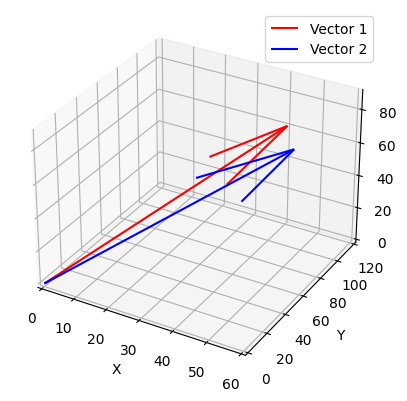

In [5]:
# Define the vectors
v1 = np.array([40, 120, 60])
v2 = np.array([60, 50, 90])

# Draw out the vectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='r', label='Vector 1')
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='b', label='Vector 2')
ax.set_xlim([0, max(v1[0], v2[0])])
ax.set_ylim([0, max(v1[1], v2[1])])
ax.set_zlim([0, max(v1[2], v2[2])])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

In [8]:
from sys import dont_write_bytecode
# calculate distances
euclidean_dist = euclidean(v1, v2)
manhantan_dist = cityblock(v1, v2)
cosine_dist = 1 - cosine(v1, v2)
dot_product = np.dot(v1, v2)

print(f"Euclidean distance: {euclidean_dist}")
print(f"Manhattan distance: {manhantan_dist}")
print(f"Cosine similarity: {cosine_dist}")
print(f"Dot product:{dot_product}")

Euclidean distance: 78.74007874011811
Manhattan distance: 120
Cosine similarity: 0.827193053178165
Dot product:13800



Color with smaller cosine distance: RGB(49, 201, 88)
New cosine distance: 0.00


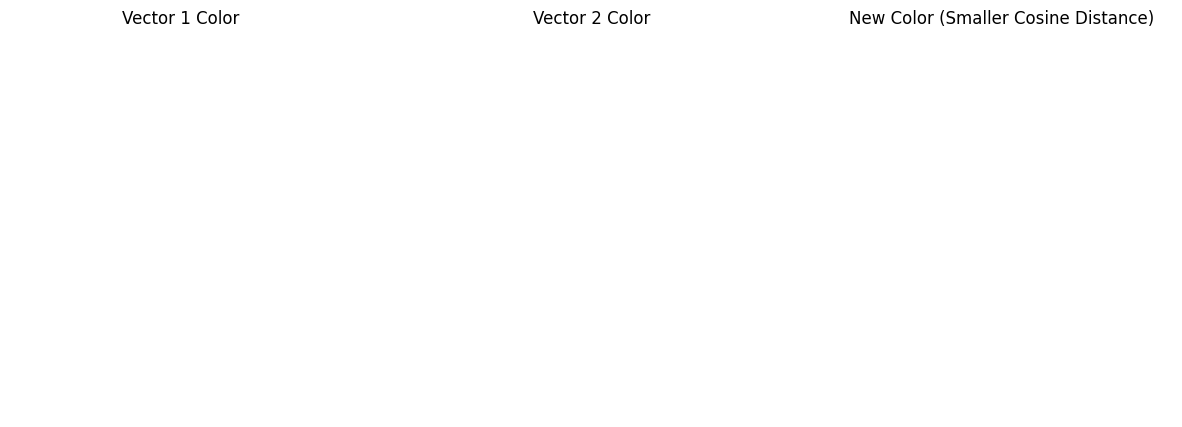

In [11]:
def rgb_to_lab(rgb):
    rgb_color = sRGBColor(rgb[0]/255, rgb[1]/255, rgb[2]/255)
    lab_color = convert_color(rgb_color, LabColor)
    return np.array([lab_color.lab_l, lab_color.lab_a, lab_color.lab_b])

def lab_to_rgb(lab):
    lab_color = LabColor(lab[0], lab[1], lab[2])
    rgb_color = convert_color(lab_color, sRGBColor)
    return np.array([int(rgb_color.rgb_r * 255), int(rgb_color.rgb_g * 255), int(rgb_color.rgb_b * 255)])

v1_lab = rgb_to_lab(v1)

# Generate random colors and find one with smaller cosine distance
num_attempts = 1000
best_color = None
best_distance = cosine_dist

for _ in range(num_attempts):
    random_rgb = np.random.randint(0, 256, 3)
    random_lab = rgb_to_lab(random_rgb)
    distance = cosine(v1_lab, random_lab)

    if distance < best_distance:
        best_distance = distance
        best_color = random_rgb

print(f"\nColor with smaller cosine distance: RGB{tuple(best_color)}")
print(f"New cosine distance: {best_distance:.2f}")

# Visualize the colors
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.set_facecolor(v1/255)
ax1.set_title("Vector 1 Color")
ax1.axis('off')

ax2.set_facecolor(v2/255)
ax2.set_title("Vector 2 Color")
ax2.axis('off')

ax3.set_facecolor(best_color/255)
ax3.set_title("New Color (Smaller Cosine Distance)")
ax3.axis('off')

plt.show()

In [12]:
import numpy as np
from scipy.spatial.distance import cosine

# Original vector
v1 = np.array([40, 120, 60])

# Color found previously with smaller cosine distance
best_color = np.array([49, 201, 88])

# Recalculate cosine distance
cosine_dist = cosine(v1, best_color)

print(f"Original vector: RGB{tuple(v1)}")
print(f"Color with smaller cosine distance: RGB{tuple(best_color)}")
print(f"Recalculated cosine distance: {cosine_dist:.4f}")

# Describe the color
r, g, b = best_color
print(f"\nColor description:")
print(f"Red component: {r}/255 ({r/2.55:.1f}%)")
print(f"Green component: {g}/255 ({g/2.55:.1f}%)")
print(f"Blue component: {b}/255 ({b/2.55:.1f}%)")

if g > r and g > b:
    print("This color is predominantly green, with a significant amount of red and a smaller amount of blue.")
elif r > g and r > b:
    print("This color is predominantly red, with a significant amount of green and a smaller amount of blue.")
else:
    print("This color is predominantly blue, with significant amounts of green and red.")

Original vector: RGB(40, 120, 60)
Color with smaller cosine distance: RGB(49, 201, 88)
Recalculated cosine distance: 0.0037

Color description:
Red component: 49/255 (19.2%)
Green component: 201/255 (78.8%)
Blue component: 88/255 (34.5%)
This color is predominantly green, with a significant amount of red and a smaller amount of blue.


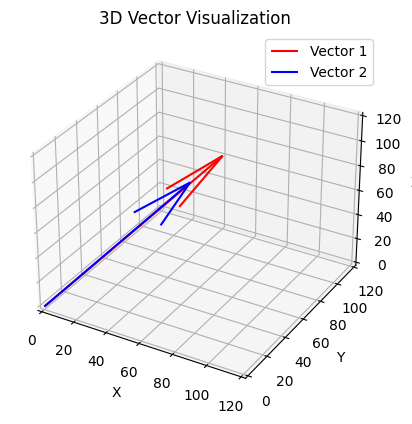

Euclidean distance: 78.74
Manhattan distance: 120.00
Cosine distance: 0.17
Dot product: 13800.00

Color with smaller cosine distance from the first vector: cyan
RGB values: [0, 1, 1]


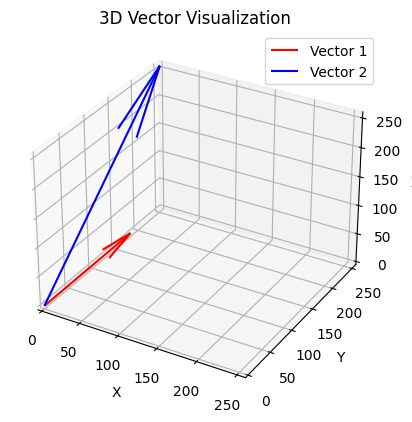

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity

def draw_vectors(v1, v2):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot vectors
    ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='r', label='Vector 1')
    ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='b', label='Vector 2')

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Vector Visualization')
    ax.legend()

    # Set axis limits
    max_val = max(np.max(v1), np.max(v2))
    ax.set_xlim([0, max_val])
    ax.set_ylim([0, max_val])
    ax.set_zlim([0, max_val])

    plt.show()

def euclidean_distance(v1, v2):
    return np.linalg.norm(np.array(v1) - np.array(v2))

def manhattan_distance(v1, v2):
    return np.sum(np.abs(np.array(v1) - np.array(v2)))

def cosine_distance(v1, v2):
    return 1 - cosine_similarity([v1], [v2])[0][0]

def dot_product(v1, v2):
    return np.dot(v1, v2)

def find_closer_color(v1):
    # Define some color vectors (RGB values divided by 255)
    colors = {
        "red": [1, 0, 0],
        "green": [0, 1, 0],
        "blue": [0, 0, 1],
        "yellow": [1, 1, 0],
        "cyan": [0, 1, 1],
        "magenta": [1, 0, 1],
        "orange": [1, 0.5, 0],
        "purple": [0.5, 0, 0.5],
        "brown": [0.6, 0.3, 0],
        "pink": [1, 0.7, 0.7]
    }

    # Normalize the input vector
    v1_norm = np.array(v1) / 255

    # Calculate cosine distances
    distances = {color: cosine_distance(v1_norm, np.array(vec)) for color, vec in colors.items()}

    # Find the color with the smallest cosine distance
    closest_color = min(distances, key=distances.get)
    return closest_color, colors[closest_color]

# Main program
v1 = [40, 120, 60]
v2 = [60, 50, 90]

# 1. Draw vectors
draw_vectors(v1, v2)

# 2. Calculate distances
print(f"Euclidean distance: {euclidean_distance(v1, v2):.2f}")
print(f"Manhattan distance: {manhattan_distance(v1, v2):.2f}")
print(f"Cosine distance: {cosine_distance(v1, v2):.2f}")
print(f"Dot product: {dot_product(v1, v2):.2f}")

# 3. Find a color with smaller cosine distance
closer_color, color_vector = find_closer_color(v1)
print(f"\nColor with smaller cosine distance from the first vector: {closer_color}")
print(f"RGB values: {color_vector}")

# Visualize the original vector and the closer color
draw_vectors(v1, [int(c * 255) for c in color_vector])